In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
 
df_features = pd.read_csv(r'F:/Job/9.美团比赛/data0413.csv',encoding='gbk',usecols=[3,4,5,6,7,8,9,10,11,12]) # 读入数据

In [18]:
df_features

,常住人口(万人),人口密度(人/平方公里),常住人口增长率(‰),地区生产总值(万元),地区生产总值增长率(%),人均地区生产总值(元),食品消费价格指数,生鲜电商数量,生鲜电商密度(家/每平方公里),每万人生鲜电商数(家/万人)
0,166.29,20769,17.9,45464993,7.2,273408,109.0,32.0,0.4068,1924.3490
1,105.66,13205,16.1,23902556,6.8,226221,109.0,14.0,0.1778,1325.0047
2,24.36,3239,2.9,6564795,8.2,269491,109.0,2.0,0.0267,821.0181
3,154.58,7965,34.9,61036866,7.6,394856,109.0,40.0,0.2133,2587.6569
4,334.25,8214,26.0,38535847,6.6,115290,109.0,54.0,0.1362,1615.5572
...,...,...,...,...,...,...,...,...,...,...
180,20.81,4655,10.2,1664500,7.4,79986,110.6,NaN,NaN,0.0000
181,13.65,5759,8.9,1700000,7.4,124542,110.6,NaN,NaN,0.0000
182,12.39,2129,6.5,1074830,7.4,86750,110.6,NaN,NaN,0.0000
183,16.07,3300,8.2,1505510,7.4,93685,110.6,NaN,NaN,0.0000


In [19]:
a=df_features.dropna(subset=['生鲜电商数量'])
a

,常住人口(万人),人口密度(人/平方公里),常住人口增长率(‰),地区生产总值(万元),地区生产总值增长率(%),人均地区生产总值(元),食品消费价格指数,生鲜电商数量,生鲜电商密度(家/每平方公里),每万人生鲜电商数(家/万人)
0,166.29,20769,17.9,45464993,7.2,273408,109.0,32.0,0.4068,1924.3490
1,105.66,13205,16.1,23902556,6.8,226221,109.0,14.0,0.1778,1325.0047
2,24.36,3239,2.9,6564795,8.2,269491,109.0,2.0,0.0267,821.0181
3,154.58,7965,34.9,61036866,7.6,394856,109.0,40.0,0.2133,2587.6569
4,334.25,8214,26.0,38535847,6.6,115290,109.0,54.0,0.1362,1615.5572
...,...,...,...,...,...,...,...,...,...,...
162,24.41,6743,7.4,2032498,7.4,83265,110.6,1.0,0.0276,409.6682
166,18.14,1541,6.1,1952800,7.4,107652,110.6,1.0,0.0085,551.2679
167,44.29,3523,8.2,4127979,7.4,93203,110.6,1.0,0.0080,225.7846
172,23.37,2516,6.0,2160936,7.4,92466,110.6,1.0,0.0108,427.8990


In [20]:
#对每列进行归一化操作
aa=a.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))

In [27]:
aa

,常住人口(万人),人口密度(人/平方公里),常住人口增长率(‰),地区生产总值(万元),地区生产总值增长率(%),人均地区生产总值(元),食品消费价格指数,生鲜电商数量,生鲜电商密度(家/每平方公里),每万人生鲜电商数(家/万人)
0,0.492468,0.579161,0.422135,0.743953,0.813850,0.680906,0.313725,0.584906,1.000000,0.628236
1,0.309259,0.367243,0.404505,0.389403,0.784066,0.556927,0.313725,0.245283,0.436793,0.424154
2,0.063591,0.088028,0.275220,0.104320,0.888310,0.670615,0.313725,0.018868,0.065175,0.252542
3,0.457083,0.220435,0.588639,1.000000,0.843634,1.000000,0.313725,0.735849,0.524102,0.854099
4,1.000000,0.227412,0.501469,0.630017,0.769173,0.265466,0.313725,1.000000,0.334481,0.523090
...,...,...,...,...,...,...,...,...,...,...
162,0.063742,0.186199,0.319295,0.029796,0.828742,0.181323,0.627451,0.000000,0.067388,0.112473
166,0.044796,0.040456,0.306562,0.028485,0.828742,0.245397,0.627451,0.000000,0.020413,0.160689
167,0.123815,0.095985,0.327130,0.064252,0.828742,0.207434,0.627451,0.000000,0.019183,0.049859
172,0.060600,0.067772,0.305583,0.031908,0.828742,0.205498,0.627451,0.000000,0.026070,0.118681


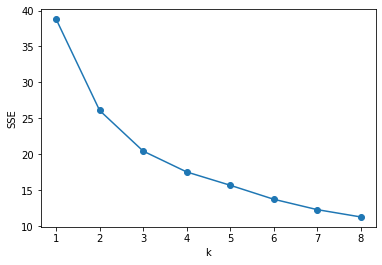

In [25]:
import warnings
warnings.filterwarnings("ignore")
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    estimator.fit(aa)
#     estimator.fit(df_features[['ZL']])
    SSE.append(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

# 打标签

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
#inputfile = 'F:/Job/9.美团比赛/data0413.csv' #待聚类的数据文件
outputfile = 'F:/Job/9.美团比赛/result11111.xls' #保存结果的文件名
# k = 5 #聚类的类别
k=[3,4,5,6]
iteration = 500 #聚类最大循环次数
#data_zs = pd.read_csv(inputfile,encoding='gbk',usecols=[3,4,5,6,7,8,9,10,11,12]) #读取数据
data_zs=aa
rrr=data_zs
co=data_zs.columns
for i in range(4):
    print()
    print('No . %d' %(i))
    b = pd.DataFrame(data_zs)
    a=k[i]
    model = KMeans(n_clusters = a, n_jobs = 4) #分为k类，并发数4
    model.fit(b) #开始聚类

    #简单打印结果
    r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
    r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
    r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
    r.columns = list(b.columns) + [u'类别数目%s'%i] #重命名表头
    print(r)

    #详细输出原始数据及其类别
    rrr = pd.concat([rrr, pd.Series(model.labels_, index =b.index)], axis = 1)  #详细输出每个样本对应的类别
    co= list(co) + [u'聚类类别%s'%i] #重命名表头
    rrr.columns = co
rrr.to_excel(outputfile) #保存结果


No . 0
   常住人口(万人)  人口密度(人/平方公里)  常住人口增长率(‰)  地区生产总值(万元)  地区生产总值增长率(%)  人均地区生产总值(元)  \
0  0.235676      0.049278    0.357523    0.085866      0.720565     0.165676   
1  0.566060      0.285886    0.543462    0.540456      0.775968     0.470779   
2  0.179795      0.033649    0.353134    0.056841      0.654815     0.134922   

   食品消费价格指数    生鲜电商数量  生鲜电商密度(家/每平方公里)  每万人生鲜电商数(家/万人)  类别数目0  
0  0.188113  0.067807         0.037983        0.187988     32  
1  0.317402  0.456368         0.345256        0.440305     16  
2  0.699673  0.052830         0.021331        0.205142     60  

No . 1
   常住人口(万人)  人口密度(人/平方公里)  常住人口增长率(‰)  地区生产总值(万元)  地区生产总值增长率(%)  人均地区生产总值(元)  \
0  0.580779      0.301172    0.517009    0.551298      0.773591     0.468921   
1  0.193634      0.029127    0.314479    0.053144      0.690897     0.111846   
2  0.149477      0.045044    0.496878    0.085038      0.552215     0.215983   
3  0.240984      0.052883    0.362896    0.090498      0.729658     0.174872   

   食品消